# Lecture 12 Convolutional Neural Network Tutoiral

## Simple MNIST CNN Model

**Modified from:** [fchollet](https://twitter.com/fchollet)<br>
**Last modified:** 2021/01/01<br>
**Description:** A simple convolutional Neural network that achieves ~99% test accuracy on MNIST.

---
### Workflow of the tutorial

In the tutorial, we will construct a simple convolution neural network with multiple layers. And the model will be trained with `MNIST` containing binary images of handwritten digits. The model aims to recongize the digit from the images. 

* [0 - Load packages](#0.1)
* [1 - Preprocessing training data](#1.0)
    * [1.1 Download training set and testing set of MNIST data from Keras API](#1.1)
    * [1.2 Normalize and preprocess data](#1.2)
    * [1.3 Visualizing MNIST data](#1.3)
* [2 - Construct Convolutional Neural Network](#2.0)
    * [2.1 Use Keras.Sequential to build the model](#2.1)
    * [2.2 Visualizing the model](#2.1)
* [3 Train CNN model with the MNIST data](#3.0)
    * [3.1 Train the model with testing set](#3.1)
    * [3.2 Visualizing trainning history](#3.2)
* [4 Evaluate model](#4.0)
    * [4.1 Compare the validating history and training history](#4.1)
* [5 Deployment of the model](#5.0)
    * [5.1 Export and load the model](#5.1)
---
### <font color="#208eb7"> Tutorial assignment </font>

- Questions are included in the tutorial sections. Please answer the questions with respect to the question numbers.
- Please submit a **final report** summarizing the method used and corresponding results.
    - Graphyics and illustations are encouraged in the report

---

## Start of the tutorial
---
<a class="anchor" id="0.1"></a>
### 0 - Load Packages

In the tutorial, `KERAS` is package is used and it is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. API refers to `Application Programming Interface`.

`KERAS` provides organized sample data for different machine learning application. For example, in the following tutorial we will use MNIST dataset dedicated for Convolutional Neural Network application. 

It also provides pre-constructed layers of machine learning algorithms, thus the developers can select essential abstractions and building blocks for developing and shipping machine learning solutions with ease.

---
**Notice** A list of compatibility warnings maybe shown during import. These warning can be ignored.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

/Users/jeremy/opt/anaconda3/envs/phasenet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jeremy/opt/anaconda3/envs/phasenet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jeremy/opt/anaconda3/envs/phasenet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jeremy/opt/anacond

<a class="anchor" id="1.0"></a>
### 1 - Prepare training data

MNIST dataset is a collections of handwritten digital numbers (i.e. 0-9) with 28*28 pixels.

The following obtain the dataset from keras database via `keras.datasets.mnist`

Please try the code below to see the docstrings of the dataset:

    keras.datasets.mnist?
    keras.datasets.mnist.load_data?

In [2]:
keras.datasets.mnist.load_data?

<a class="anchor" id="1.1"></a>
#### 1.1 Download training set and testing set of MNIST data from Keras API

<a class="anchor" id="1.2"></a>
#### 1.2 Normalize and preprocess data
- Normalize data (Scale amplitude of the data to [0, 1] range)
- Create Suitable data shape and format (28, 28, 1)
- Convert 0,1,2,...,9 classes to binary class matrix

**Question 1.1** How many handwritten digital numbers in training set and testing set respectively in downloaded data?

**Question 1.2** What is the shape of the training data?

**Question 1.3** 
- What is the format of the label (y) before and after the binary class transformation? 
- What is the label of a '9' digit drawing after the transformation? 
- Why do we do so?

In [16]:
### 1.1 Download MNIST data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

### 1.2 Nomalize and preprocess data
# Scale images to the [0, 1] range
x_train = x_train_mnist.astype("float32") / 255
x_test = x_test_mnist.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train_mnist, -1)
x_test = np.expand_dims(x_test_mnist, -1)
#print("x_train shape:", x_train.shape)
#print(x_train.shape[0], "train samples")
#print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_mnist, num_classes)
y_test = keras.utils.to_categorical(y_test_mnist, num_classes)

<a class="anchor" id="1.3"></a>
#### 1.3 Visualizing MNIST data

The following will plot the data using Matplotlib.pyplot with single plot and multiple subplots.

**Questuon 1.4** Plot 0-9 handwritten digits (in total 10) from MNIST data accordingly.

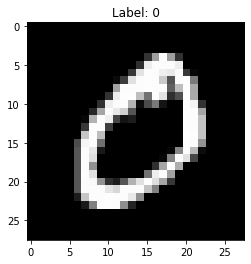

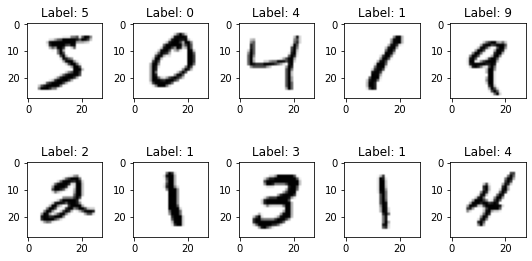

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

### pick a sample to plot
sample = 1
image = x_train_mnist[sample]
label = y_train_mnist[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title('Label: {}'.format(label))
plt.show()

### Multiple plot
num = 10
images = x_train_mnist[:num]
labels = y_train_mnist[:num]

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

<a class="anchor" id="2.0"></a>
### 2 - Construct Convolutional Neural Network
<a class="anchor" id="2.1"></a>
#### 2.1 Use Keras.Sequential to build the model
- Using ` keras.Sequential( [ Layers ] )`

**Questions 2.1** How many layers of convolution in the model below?

**Questions 2.2** What is the input shape of the model and the output shape of the model?

In [6]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
____

<a class="anchor" id="2.2"></a>
#### 2.2 Visualizing the model

<img src="img/MNIST_CNN.png" width="400">
**Notice** Install `pydot` package via `pip install pydot` if required

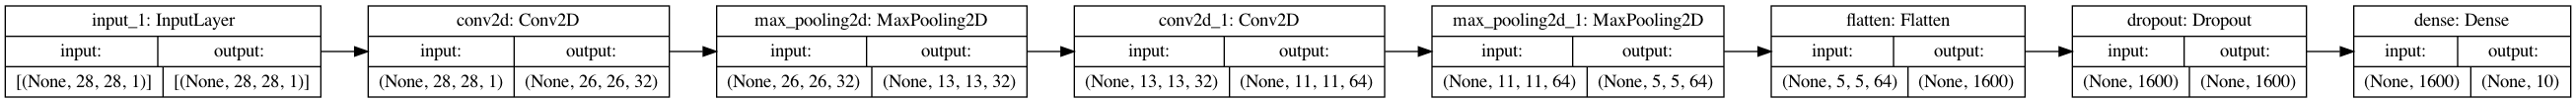

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
       show_shapes=True,
       show_layer_names=True,
       rankdir="LR" # TB - vertical plot; LR - horizontal plot
    )

<a class="anchor" id="3.0"></a>
### 3. Train the model

#### 3.1
In the following, we will train the model with the dataset prepared (training set). 

    Batch   - Number of samples processed before the model is updated
            (Number of samples per gradient update)
    epochs - Number of complete passes through the training dataset
    validation_split - Fraction of the training data to be used as validation data

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

results = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 30s 554us/sample - loss: 0.0627 - acc: 0.9803 - val_loss: 0.0424 - val_acc: 0.9880
Epoch 2/15
54000/54000 [==============================] - 39s 723us/sample - loss: 0.0598 - acc: 0.9814 - val_loss: 0.0395 - val_acc: 0.9898
Epoch 3/15
54000/54000 [==============================] - 39s 720us/sample - loss: 0.0552 - acc: 0.9823 - val_loss: 0.0383 - val_acc: 0.9895
Epoch 4/15
54000/54000 [==============================] - 32s 597us/sample - loss: 0.0526 - acc: 0.9839 - val_loss: 0.0357 - val_acc: 0.9908
Epoch 5/15
54000/54000 [==============================] - 33s 603us/sample - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0385 - val_acc: 0.9893
Epoch 6/15
54000/54000 [==============================] - 33s 609us/sample - loss: 0.0515 - acc: 0.9834 - val_loss: 0.0346 - val_acc: 0.9907
Epoch 7/15
54000/54000 [==============================] - 32s 598us/sample - loss: 0.0469 - acc: 0.9850 -

#### 3.2 Plotting the training and validation history

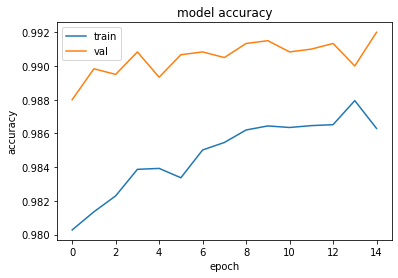

In [14]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 5 Evaluate the trained model
The model performance is evaluated with independent testing set.


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0384405962202678
Test accuracy: 0.99


### 6. Export and load model
    

In [9]:
path_to_model ='model/MNIST_CNN_2Layer.keras'
model.save(path_to_model)
model2 = keras.load_model(path_to_model)

### Online resources

https://whitead.github.io/dmol-book/applied/QM9.html